In [1]:
import pandas as pd

In [2]:
phs = pd.read_csv('data/phs2020.csv')
map_data = pd.read_csv('data/year_team12_data.csv')

# map_data

In [3]:
map_data.head()

,key,map_winner,attacker_payload_distance1,attacker_payload_distance2,defender_payload_distance1,defender_payload_distance2,attacker_time_banked1,attacker_time_banked2,defender_time_banked1,defender_time_banked2,attacker_control_perecent1,attacker_control_perecent2,defender_control_perecent1,defender_control_perecent2,team_one_name,team_two_name,year,map_name
0,"(10223, 'Dorado')",Los Angeles Valiant,75.649597,75.615051,0.0,75.615051,125.750572,0.000000,240.000000,0.000000,0.0,0.0,0.0,0.0,Los Angeles Valiant,San Francisco Shock,2018,Dorado
1,"(10223, 'Temple of Anubis')",Los Angeles Valiant,0.000000,0.000000,0.0,0.000000,262.185089,250.492004,276.396057,500.984009,0.0,0.0,0.0,0.0,Los Angeles Valiant,San Francisco Shock,2018,Temple of Anubis
2,"(10223, 'Ilios')",Los Angeles Valiant,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,299.0,0.0,0.0,165.0,Los Angeles Valiant,San Francisco Shock,2018,Ilios
3,"(10223, 'Numbani')",Los Angeles Valiant,75.563667,75.549507,0.0,75.549507,165.840027,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,Los Angeles Valiant,San Francisco Shock,2018,Numbani
4,"(10224, 'Dorado')",Los Angeles Gladiators,70.178932,70.161865,0.0,70.161865,186.312805,0.000000,240.000000,0.000000,0.0,0.0,0.0,0.0,Los Angeles Gladiators,Shanghai Dragons,2018,Dorado


* 2020년 데이터만 사용

In [4]:
map_data= map_data[map_data['year']==2020]

In [5]:
map_data.head()

,key,map_winner,attacker_payload_distance1,attacker_payload_distance2,defender_payload_distance1,defender_payload_distance2,attacker_time_banked1,attacker_time_banked2,defender_time_banked1,defender_time_banked2,attacker_control_perecent1,attacker_control_perecent2,defender_control_perecent1,defender_control_perecent2,team_one_name,team_two_name,year,map_name
2479,"(30991, 'Lijiang Tower')",Paris Eternal,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.0,0.000000,50.0,0.0,0.0,200.0,Toronto Defiant,Paris Eternal,2020,Lijiang Tower
2480,"(30991, 'Eichenwalde')",Toronto Defiant,67.706619,67.740669,0.0,135.481339,76.569,83.778030,0.0,167.556061,0.0,0.0,0.0,0.0,Paris Eternal,Toronto Defiant,2020,Eichenwalde
2481,"(30991, 'Horizon Lunar Colony')",Toronto Defiant,0.000000,0.000000,0.0,0.000000,0.000,239.463058,0.0,189.552032,0.0,0.0,0.0,0.0,Paris Eternal,Toronto Defiant,2020,Horizon Lunar Colony
2482,"(30991, 'Havana')",Toronto Defiant,83.076736,103.352371,0.0,103.352371,0.000,24.201035,0.0,24.201035,0.0,0.0,0.0,0.0,Paris Eternal,Toronto Defiant,2020,Havana
2483,"(30992, 'Lijiang Tower')",London Spitfire,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.0,0.000000,200.0,0.0,0.0,198.0,London Spitfire,New York Excelsior,2020,Lijiang Tower


### 무승부, 이벤트게임 데이터 삭제

In [6]:
map_data['map_winner'].value_counts()

San Francisco Shock       100
Shanghai Dragons           94
Philadelphia Fusion        90
Paris Eternal              75
Florida Mayhem             69
Seoul Dynasty              68
New York Excelsior         66
Atlanta Reign              59
Guangzhou Charge           58
Los Angeles Gladiators     54
Los Angeles Valiant        53
Washington Justice         46
Toronto Defiant            45
Chengdu Hunters            44
Dallas Fuel                43
Hangzhou Spark             42
Houston Outlaws            37
London Spitfire            31
Vancouver Titans           29
Boston Uprising            21
draw                       18
Team Universe               2
Team Reinhardt              2
Brick Movers                2
Team Jake                   2
Team D.va                   1
Triple A                    1
Team Custa                  1
Name: map_winner, dtype: int64

In [7]:
a = map_data['map_winner'].value_counts()
a = a[map_data['map_winner'].value_counts()<=18]
a.sum()

29

In [8]:
map_data.shape[0]-a.sum()

1124

In [9]:
for val in a.index:
    #print(val)
    idx = map_data[map_data['map_winner']==val].index
    map_data = map_data.drop(idx)

In [10]:
map_data.shape

(1124, 18)

* key data 열로

In [11]:
from ast import literal_eval
map_data['key'] = map_data['key'].apply(literal_eval)

In [12]:
map_data['esports_match_id'] = [i for i,n in map_data['key']]
map_data['map_name'] = [n for i,n in map_data['key']]

In [13]:
map_data.head()

,key,map_winner,attacker_payload_distance1,attacker_payload_distance2,defender_payload_distance1,defender_payload_distance2,attacker_time_banked1,attacker_time_banked2,defender_time_banked1,defender_time_banked2,attacker_control_perecent1,attacker_control_perecent2,defender_control_perecent1,defender_control_perecent2,team_one_name,team_two_name,year,map_name,esports_match_id
2479,"(30991, Lijiang Tower)",Paris Eternal,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.0,0.000000,50.0,0.0,0.0,200.0,Toronto Defiant,Paris Eternal,2020,Lijiang Tower,30991
2480,"(30991, Eichenwalde)",Toronto Defiant,67.706619,67.740669,0.0,135.481339,76.569,83.778030,0.0,167.556061,0.0,0.0,0.0,0.0,Paris Eternal,Toronto Defiant,2020,Eichenwalde,30991
2481,"(30991, Horizon Lunar Colony)",Toronto Defiant,0.000000,0.000000,0.0,0.000000,0.000,239.463058,0.0,189.552032,0.0,0.0,0.0,0.0,Paris Eternal,Toronto Defiant,2020,Horizon Lunar Colony,30991
2482,"(30991, Havana)",Toronto Defiant,83.076736,103.352371,0.0,103.352371,0.000,24.201035,0.0,24.201035,0.0,0.0,0.0,0.0,Paris Eternal,Toronto Defiant,2020,Havana,30991
2483,"(30992, Lijiang Tower)",London Spitfire,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.0,0.000000,200.0,0.0,0.0,198.0,London Spitfire,New York Excelsior,2020,Lijiang Tower,30992


# phs 피벗 테이블 

In [14]:
phs_pivot = pd.pivot_table(phs,                # 피벗할 데이터프레임
                     index = ['esports_match_id','map_name','team_name'],    # 행 위치에 들어갈 열
                     columns = 'stat_name',    # 열 위치에 들어갈 열
                     values = 'stat_amount',     # 데이터로 사용할 열
                     aggfunc = 'sum') 

In [15]:
phs_pivot.head()

stat_name                                              Ability Damage Done  \
esports_match_id map_name             team_name                              
30991            Eichenwalde          Paris Eternal                    NaN   
                                      Toronto Defiant                  NaN   
                 Havana               Paris Eternal                    NaN   
                                      Toronto Defiant                  NaN   
                 Horizon Lunar Colony Paris Eternal             106.100025   

stat_name                                              Accretion Kills  \
esports_match_id map_name             team_name                          
30991            Eichenwalde          Paris Eternal                NaN   
                                      Toronto Defiant              NaN   
                 Havana               Paris Eternal                NaN   
                                      Toronto Defiant              NaN   
                 Horizon Lunar Colony Paris Eternal                NaN   

stat_name                                              Accretion Stuns  \
esports_match_id map_name             team_name                          
30991            Eichenwalde          Paris Eternal                NaN   
                                      Toronto Defiant              NaN   
                 Havana               Paris Eternal                NaN   
                                      Toronto Defiant              NaN   
                 Horizon Lunar Colony Paris Eternal                NaN   

stat_name                                              Adaptive Shield Uses  \
esports_match_id map_name             team_name                               
30991            Eichenwalde          Paris Eternal                     1.0   
                                      Toronto Defiant                   NaN   
                 Havana               Paris Eternal                     NaN   
                                      Toronto Defiant                   NaN   
                 Horizon Lunar Colony Paris Eternal                     NaN   

stat_name                                              Air Uptime  \
esports_match_id map_name             team_name                     
30991            Eichenwalde          Paris Eternal         1.093   
                                      Toronto Defiant       0.001   
                 Havana               Paris Eternal           NaN   
                                      Toronto Defiant         NaN   
                 Horizon Lunar Colony Paris Eternal         0.303   

stat_name                                              Air Uptime Percentage  \
esports_match_id map_name             team_name                                
30991            Eichenwalde          Paris Eternal                 0.070193   
                                      Toronto Defiant               0.000342   
                 Havana               Paris Eternal                      NaN   
                                      Toronto Defiant                    NaN   
                 Horizon Lunar Colony Paris Eternal                 0.016386   

stat_name                                              All Damage Done  \
esports_match_id map_name             team_name                          
30991            Eichenwalde          Paris Eternal      215077.685584   
                                      Toronto Defiant    258857.476470   
                 Havana               Paris Eternal      135271.593583   
                                      Toronto Defiant    173850.025950   
                 Horizon Lunar Colony Paris Eternal      163000.693570   

stat_name                                              Amped Heal Activations  \
esports_match_id map_name             team_name                                 
30991            Eichenwalde          Paris Eternal                      11.0   
                                      Toronto Defiant 

match_id, map_name,team_name이 인덱스로 되어있는데 이것을 열로만들어 줍니다.

In [16]:
phs_pivot.reset_index(inplace=True)  

In [17]:
phs_pivot.head()

stat_name,esports_match_id,map_name,team_name,Ability Damage Done,Accretion Kills,Accretion Stuns,Adaptive Shield Uses,Air Uptime,Air Uptime Percentage,All Damage Done,...,Unscoped Accuracy,Unscoped Hits,Unscoped Shots,Valkyrie Healing Efficiency,Venom Mine Kills,Weapon Accuracy,Weapon Kills,Whole Hog Efficiency,Whole Hog Kills,of Rockets Fired
0,30991,Eichenwalde,Paris Eternal,NaN,NaN,NaN,1.0,1.093,0.070193,215077.685584,...,NaN,NaN,NaN,NaN,NaN,4.131859,NaN,NaN,NaN,NaN
1,30991,Eichenwalde,Toronto Defiant,NaN,NaN,NaN,NaN,0.001,0.000342,258857.476470,...,0.600386,311.0,518.0,NaN,NaN,3.350676,NaN,NaN,NaN,NaN
2,30991,Havana,Paris Eternal,NaN,NaN,NaN,NaN,NaN,NaN,135271.593583,...,NaN,NaN,1.0,NaN,NaN,4.153382,NaN,NaN,NaN,NaN
3,30991,Havana,Toronto Defiant,NaN,NaN,NaN,NaN,NaN,NaN,173850.025950,...,0.564286,158.0,280.0,NaN,NaN,3.183424,NaN,NaN,NaN,NaN
4,30991,Horizon Lunar Colony,Paris Eternal,106.100025,NaN,NaN,NaN,0.303,0.016386,163000.693570,...,NaN,NaN,NaN,NaN,NaN,5.673673,NaN,NaN,NaN,NaN


In [18]:
phs_pivot.shape

(2282, 362)

* win 열 만들기

In [19]:
phs_pivot['win'] = range(0,len(phs_pivot))

In [20]:
for i in range(len(phs_pivot)):
    try:
        match_id = (map_data['esports_match_id']==phs_pivot.loc[i,'esports_match_id'])
        map_name = (map_data['map_name']==phs_pivot.loc[i,'map_name'])
        team1 = (map_data['team_one_name'] == phs_pivot.loc[i,'team_name'])
        team2 = (map_data['team_two_name'] == phs_pivot.loc[i,'team_name'])

        k = map_data[match_id&map_name]
        k = k[team1|team2]
        #print(type(k.loc[:,'map_winner'].values[0]))
        #print(type(phs_pivot.loc[i,'team_name']))
        if k.loc[:,'map_winner'].values[0] == phs_pivot.loc[i,'team_name']:
            phs_pivot.loc[i,'win'] = 1
        else:
            phs_pivot.loc[i,'win'] = 0

    except IndexError:
        phs_pivot.loc[i,'win'] = None

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFram

In [21]:
phs_pivot['win'].value_counts()

1.0    1123
0.0    1123
Name: win, dtype: int64

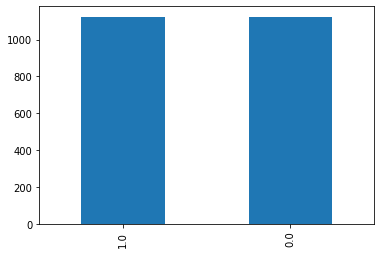

In [33]:
phs_pivot['win'].value_counts().plot.bar()

In [22]:
phs_pivot.head()

stat_name,esports_match_id,map_name,team_name,Ability Damage Done,Accretion Kills,Accretion Stuns,Adaptive Shield Uses,Air Uptime,Air Uptime Percentage,All Damage Done,...,Unscoped Hits,Unscoped Shots,Valkyrie Healing Efficiency,Venom Mine Kills,Weapon Accuracy,Weapon Kills,Whole Hog Efficiency,Whole Hog Kills,of Rockets Fired,win
0,30991,Eichenwalde,Paris Eternal,NaN,NaN,NaN,1.0,1.093,0.070193,215077.685584,...,NaN,NaN,NaN,NaN,4.131859,NaN,NaN,NaN,NaN,0.0
1,30991,Eichenwalde,Toronto Defiant,NaN,NaN,NaN,NaN,0.001,0.000342,258857.476470,...,311.0,518.0,NaN,NaN,3.350676,NaN,NaN,NaN,NaN,1.0
2,30991,Havana,Paris Eternal,NaN,NaN,NaN,NaN,NaN,NaN,135271.593583,...,NaN,1.0,NaN,NaN,4.153382,NaN,NaN,NaN,NaN,0.0
3,30991,Havana,Toronto Defiant,NaN,NaN,NaN,NaN,NaN,NaN,173850.025950,...,158.0,280.0,NaN,NaN,3.183424,NaN,NaN,NaN,NaN,1.0
4,30991,Horizon Lunar Colony,Paris Eternal,106.100025,NaN,NaN,NaN,0.303,0.016386,163000.693570,...,NaN,NaN,NaN,NaN,5.673673,NaN,NaN,NaN,NaN,0.0


## 데이터 저장 후 확인

In [24]:
#phs_pivot.to_csv('data/labeled_phs.csv',index=False)

In [25]:
dfk = pd.read_csv('data/labeled_phs.csv')

In [26]:
dfk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Columns: 363 entries, esports_match_id to win
dtypes: float64(360), int64(1), object(2)
memory usage: 6.3+ MB


In [27]:
dfk.columns

Index(['esports_match_id', 'map_name', 'team_name', 'Ability Damage Done',
       'Accretion Kills', 'Accretion Stuns', 'Adaptive Shield Uses',
       'Air Uptime', 'Air Uptime Percentage', 'All Damage Done',
       ...
       'Unscoped Hits', 'Unscoped Shots', 'Valkyrie Healing Efficiency',
       'Venom Mine Kills', 'Weapon Accuracy', 'Weapon Kills',
       'Whole Hog Efficiency', 'Whole Hog Kills', 'of Rockets Fired', 'win'],
      dtype='object', length=363)

In [28]:
dfk.head()

,esports_match_id,map_name,team_name,Ability Damage Done,Accretion Kills,Accretion Stuns,Adaptive Shield Uses,Air Uptime,Air Uptime Percentage,All Damage Done,...,Unscoped Hits,Unscoped Shots,Valkyrie Healing Efficiency,Venom Mine Kills,Weapon Accuracy,Weapon Kills,Whole Hog Efficiency,Whole Hog Kills,of Rockets Fired,win
0,30991,Eichenwalde,Paris Eternal,NaN,NaN,NaN,1.0,1.093,0.070193,215077.685584,...,NaN,NaN,NaN,NaN,4.131859,NaN,NaN,NaN,NaN,0.0
1,30991,Eichenwalde,Toronto Defiant,NaN,NaN,NaN,NaN,0.001,0.000342,258857.476470,...,311.0,518.0,NaN,NaN,3.350676,NaN,NaN,NaN,NaN,1.0
2,30991,Havana,Paris Eternal,NaN,NaN,NaN,NaN,NaN,NaN,135271.593583,...,NaN,1.0,NaN,NaN,4.153382,NaN,NaN,NaN,NaN,0.0
3,30991,Havana,Toronto Defiant,NaN,NaN,NaN,NaN,NaN,NaN,173850.025950,...,158.0,280.0,NaN,NaN,3.183424,NaN,NaN,NaN,NaN,1.0
4,30991,Horizon Lunar Colony,Paris Eternal,106.100025,NaN,NaN,NaN,0.303,0.016386,163000.693570,...,NaN,NaN,NaN,NaN,5.673673,NaN,NaN,NaN,NaN,0.0


In [29]:
dfk.tail()

,esports_match_id,map_name,team_name,Ability Damage Done,Accretion Kills,Accretion Stuns,Adaptive Shield Uses,Air Uptime,Air Uptime Percentage,All Damage Done,...,Unscoped Hits,Unscoped Shots,Valkyrie Healing Efficiency,Venom Mine Kills,Weapon Accuracy,Weapon Kills,Whole Hog Efficiency,Whole Hog Kills,of Rockets Fired,win
2277,35554,Busan,Seoul Dynasty,NaN,3.0,3.0,11.0,21.029001,0.076332,75726.724523,...,107.0,196.0,511.871259,1.0,5.185361,NaN,1.333333,4.0,NaN,1.0
2278,35554,King's Row,Philadelphia Fusion,NaN,3.0,8.0,1.0,1.322000,0.050288,115014.390998,...,75.0,132.0,580.682790,1.0,4.731401,NaN,1.000000,4.0,NaN,0.0
2279,35554,King's Row,Seoul Dynasty,NaN,4.0,9.0,1.0,1.598000,0.149115,118940.868600,...,129.0,270.0,495.705588,1.0,5.878299,NaN,0.500000,2.0,NaN,1.0
2280,35554,Temple of Anubis,Philadelphia Fusion,NaN,5.0,7.0,4.0,5.039000,0.166972,105472.376045,...,145.0,260.0,432.363390,NaN,4.951246,NaN,NaN,NaN,NaN,0.0
2281,35554,Temple of Anubis,Seoul Dynasty,NaN,10.0,11.0,2.0,6.544000,0.242952,113821.955348,...,142.0,292.0,175.078913,NaN,6.153129,NaN,0.500000,1.0,0.097561,1.0
